In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Dataset = pd.read_csv("ecommerce.csv", encoding = "latin1")

Dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
Dataset["Total_Price"] = Dataset["Quantity"] * Dataset["UnitPrice"]

In [4]:
Supervised = pd.DataFrame(Dataset)
Supervised["Total_Price"] = Dataset["Total_Price"]

In [5]:
# Need to create output (target Variable) 

threshold = Supervised["Total_Price"].median()

Supervised["Best_Selling"] = Supervised["Total_Price"].apply(lambda x: 1 if x >= threshold else 0)

In [6]:
Supervised

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Best_Selling
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60,1


In [26]:
Supervised.to_csv("Cleaned_data.csv")

## Q1) Which products appear most frequently?

In [7]:
Supervised["Description"].value_counts().head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: count, dtype: int64

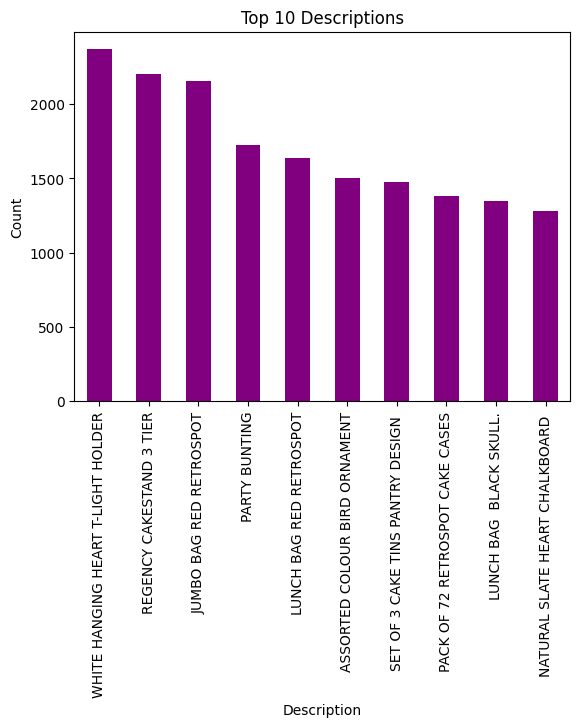

In [8]:
Supervised["Description"].value_counts().head(10).plot(kind='bar', color = "purple")
plt.title("Top 10 Descriptions")
plt.ylabel("Count")
plt.show()

### Explanation

- The **“WHITE HANGING HEART T-LIGHT HOLDER”** is the best-selling product, appearing over 2,300 times.

- Other top products include “REGENCY CAKESTAND 3 TIER”, “JUMBO BAG RED RETROSPOT”, and “PARTY BUNTING”.

- These products dominate sales compared to others, indicating they are the most popular items in customer purchases.

*In short*: This chart highlights the **most frequently ordered products** and helps identify which items drive the **majority of sales**.

**=================================================================================================**

## Q2) What’s the most profitable product?

In [9]:
# Group by product and sum up total revenue
profit_per_product = Supervised.groupby("Description")["Total_Price"].sum().reset_index()

# Find the product with maximum revenue
most_profitable = profit_per_product.loc[profit_per_product["Total_Price"].idxmax()]

print("The most profitable product is: ", most_profitable["Description"])
print("Total Profit: ", most_profitable["Total_Price"])


The most profitable product is:  DOTCOM POSTAGE
Total Profit:  206245.48


### Explanation

We calculated the total revenue (profit) for each product by summing up the Total_Price across all transactions. The product **“DOTCOM POSTAGE”** generated the **highest revenue**, with a total profit of **206,245.48**. This indicates that although it may not be the most frequently sold item, it contributed the most in terms of overall sales value.

**=================================================================================================**

## Q3) How many transactions fall under Best_Selling = 1 vs Best_Selling = 0 (target class balance)?

In [10]:
Supervised["Best_Selling"].value_counts()

Best_Selling
1    271036
0    270873
Name: count, dtype: int64

### Explanation

The dataset contains **271,036 Best-Selling transactions (1)** and **270,873 Non-Best-Selling transactions (0)**. This shows that the classes are **well balanced**, meaning there is **no significant class imbalance issue**. This balance is important for building **reliable machine learning models**, as it prevents bias towards one class.

**=================================================================================================**

## Q4) What is the distribution of Quantity sold per product (are there products sold in bulk vs individually)?

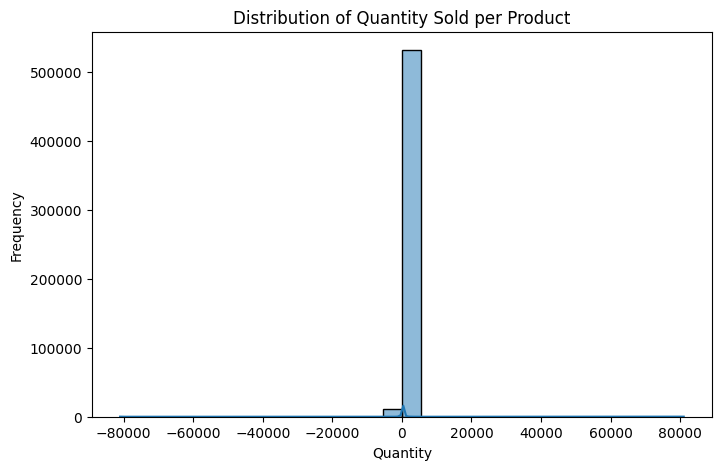

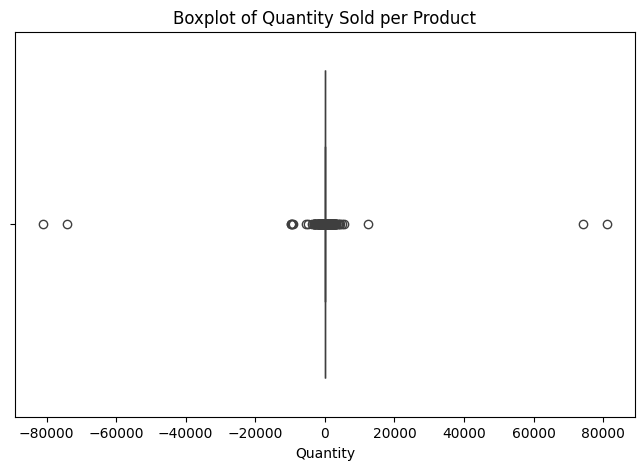

Quantity
1     148227
2      81829
12     61063
6      40868
4      38484
3      37121
24     24021
10     22288
8      13129
5      11757
Name: count, dtype: int64


In [11]:
# Distribution of Quantity sold
plt.figure(figsize=(8,5))
sns.histplot(Supervised["Quantity"], bins=30, kde=True)
plt.title("Distribution of Quantity Sold per Product")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

# Boxplot to check for bulk vs individual sales
plt.figure(figsize=(8,5))
sns.boxplot(x=Supervised["Quantity"])
plt.title("Boxplot of Quantity Sold per Product")
plt.xlabel("Quantity")
plt.show()

# Quick check of unique value counts (to see how many 1's vs large quantities)
print(Supervised["Quantity"].value_counts().head(10))


### Explanation

Most products are sold individually or in very small quantities, but a significant portion is sold in bulk packs (e.g., 12, 24). The presence of large negative values suggests returns or cancellations in the dataset.

**=================================================================================================**

## Q5) Which countries place the highest number of orders?

Country
United Kingdom    23494
Germany             603
France              461
EIRE                360
Belgium             119
Spain               105
Netherlands         101
Switzerland          74
Portugal             71
Australia            69
Name: InvoiceNo, dtype: int64


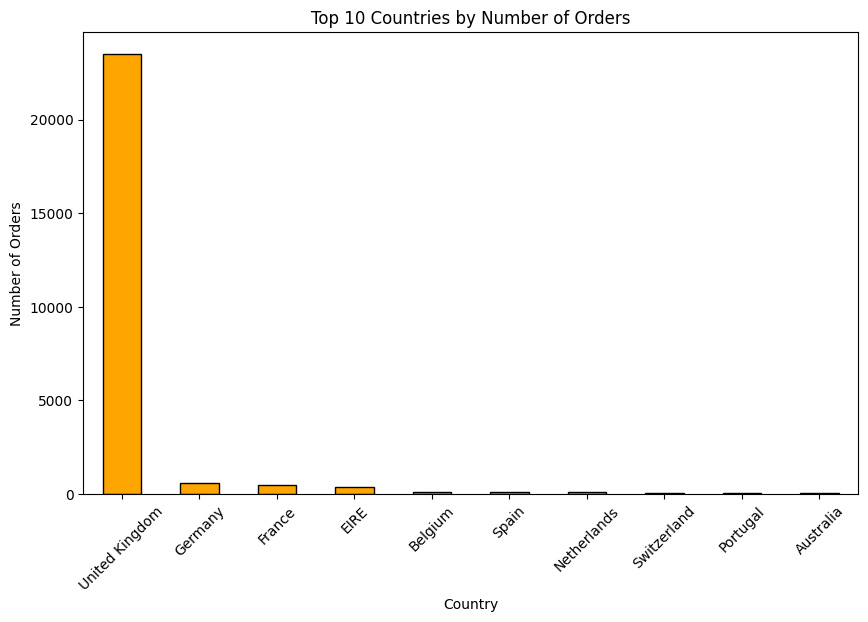

In [12]:
# Count number of orders per country
country_orders = Supervised.groupby("Country")["InvoiceNo"].nunique().sort_values(ascending=False)

# Display top 10 countries by number of orders
print(country_orders.head(10))

# Optional: Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
country_orders.head(10).plot(kind="bar", color="orange", edgecolor="black")
plt.title("Top 10 Countries by Number of Orders")
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


### Explanation

From the analysis, the **United Kingdom** places the highest number of orders, far exceeding all other countries. This is expected as the dataset is UK-based, meaning the majority of transactions originate there. Other countries like Germany, France, and EIRE follow but their contribution is relatively small

**=================================================================================================**

## Q6) How does Quantity sold vary between Best_Selling and Not Best_Selling products?

In [13]:
from scipy.stats import ttest_ind
Supervised = Supervised.dropna()
Best_Selling = Supervised[Supervised["Best_Selling"] == 1]["Quantity"]
Not_Best_Selling = Supervised[Supervised["Best_Selling"] == 0]["Quantity"]

ttest_ind(Best_Selling, Not_Best_Selling)

TtestResult(statistic=21.861390233031752, pvalue=6.973165968149142e-106, df=406827.0)

### Explanation

The t-test comparing quantities sold between Best_Selling and Not Best_Selling products shows a statistically significant difference (t ≈ 21.86, p < 0.001). This indicates that **Best_Selling products tend to be sold in significantly higher quantities** compared to non-best-sellers.

**=================================================================================================**

## Q7) What is the relationship between Unit Price and Best_Selling (are low-priced items more likely to be best-sellers)?

In [14]:
Supervised["UnitPrice"].corr(Supervised["Best_Selling"])

0.007636887349760117

### Explanation

The correlation between Unit Price and Best_Selling is 0.0076, which is extremely close to zero. This indicates that there is **no significant linear relationship** between the price of an item and its likelihood of becoming a best-seller.

In other words, being a best-selling product does not depend on whether the item is priced lower or higher. Factors such as customer demand, product quality, brand popularity, and seasonal trends are likely playing a more important role in driving sales than the price alone.

**=================================================================================================**

## Q8) Which Product have the highest Total Price contribution to Best_Selling vs Not Best_Selling?

In [15]:
# Group by Best_Selling and Product, then sum TotalPrice
contribution = Supervised.groupby(["Best_Selling", "Description"])["Total_Price"].sum().reset_index()

# For each Best_Selling group, find the product with the highest contribution
highest_contributors = contribution.loc[contribution.groupby("Best_Selling")["Total_Price"].idxmax()]

print(highest_contributors)


      Best_Selling                  Description  Total_Price
2508             0  RED RETROSPOT CHARLOTTE BAG      3655.34
5690             1  PAPER CRAFT , LITTLE BIRDIE    168469.60


### Explanation

The findings clearly highlight that while each category has a leading product, the magnitude of contribution differs considerably. The top contributor from the **Best-Selling group** accounts for a **far greater share of revenue** compared to the leading product from the Not Best-Selling group. This underscores the strong commercial significance of **“PAPER CRAFT, LITTLE BIRDIE”** and emphasizes its role as a key driver of sales performance within the dataset.

**=================================================================================================**

## Q9) How does Total Price differ between the two classes (Best_Selling vs Not)?

In [18]:
best_selling = Supervised[Supervised['Best_Selling'] == 1]['Total_Price']
not_best_selling = Supervised[Supervised['Best_Selling'] == 0]['Total_Price']

ttest_ind(best_selling, not_best_selling)

TtestResult(statistic=25.84142896830871, pvalue=3.997102265338079e-147, df=406827.0)

### Explanation

- This result indicates that the difference in Total Price contribution between Best_Selling and Not Best_Selling products is **statistically significant**.

- We conclude that Best_Selling products generate significantly more revenue.

- In other words, products that are classified as Best_Selling not only sell in higher quantities but also contribute much larger total sales revenue compared to non-best-selling items.

**=================================================================================================**

## Q10) Is there a correlation between Quantity and Total Price across all products, and how does this differ for Best_Selling vs Not?

In [24]:
Supervised[['Quantity', 'Total_Price']].corr()

,Quantity,Total_Price
Quantity,1.000000,0.916096
Total_Price,0.916096,1.000000


In [25]:
Supervised.groupby('Best_Selling')[['Quantity', 'Total_Price']].corr().unstack().iloc[:,1]

Best_Selling
0    0.917648
1    0.914412
Name: (Quantity, Total_Price), dtype: float64

### Explanation

There is a **strong positive correlation** (≈0.92) between **Quantity and Total_Price** across all products. When comparing classes, both Best-Selling (0.914) and Not Best-Selling (0.918) products show nearly **identical correlation levels**. This indicates that **quantity consistently drives total sales** regardless of whether a product is a best-seller or not.

**=================================================================================================**